In [7]:
# importing libraries and packages
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import datetime
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


In [8]:
list=[]
username='elonmusk'
scrapper = sntwitter.TwitterProfileScraper(username)
try:
        user = scrapper.entity
        # declare a username
        # for i, tweet in enumerate(scrapper.get_items()):
        list.append([user.username, user.id, user.displayname,
                     user.renderedDescription, user.verified, user.created,
                     user.followersCount, user.friendsCount, user.statusesCount,
                     user.favouritesCount, user.listedCount, user.mediaCount, user.location,
                     user.protected, user.link, user.profileImageUrl])
          # break

except:
        print('fail')

user_df = pd.DataFrame(list, columns=['username', 'id', 'displayname',
                                          'renderedDescription', 'verified', 'created',
                                          'followersCount', 'friendsCount', 'statusesCount',
                                          'favouritesCount', 'listedCount', 'mediaCount', 'location',
                                          'protected', 'link', 'profileImageUrl'])


In [9]:
user_df

,username,id,displayname,renderedDescription,verified,created,followersCount,friendsCount,statusesCount,favouritesCount,listedCount,mediaCount,location,protected,link,profileImageUrl
0,elonmusk,44196397,Elon Musk,,True,2009-06-02 20:12:29+00:00,124179223,165,21909,16625,106759,1354,,False,None,https://pbs.twimg.com/profile_images/159096873...


In [10]:

tweets_list2 = []

for i, tweet in enumerate(sntwitter.TwitterProfileScraper('elonmusk').get_items()):

    if i % 100 == 0:
        print(i)

    if i > 100:
        print(i)
        break
    tweets_list2.append([tweet.date, tweet.id, tweet.rawContent, tweet.username, tweet.lang,
                        tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.media])


0


/tmp/ipykernel_102334/2739089842.py:11: FutureWarning: username is deprecated, use user.username instead
  tweets_list2.append([tweet.date, tweet.id, tweet.rawContent, tweet.username, tweet.lang,


100
101


In [33]:
tweets_list1 = []
# data=datetime()
current_time = datetime.datetime.now()

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:=').get_items()): #declare a username
    # if (i>2):
    #     break
    if ((current_time.year-date.year)):
        break
    date=tweet.date
date.year


tweets_list1.append([tweet.date, tweet.id, tweet.rawContent, tweet.user.username, tweet.lang,
                        tweet.hashtags, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.media])
   
tweets_df1 = pd.DataFrame(tweets_list1, columns=['DateTime', 'TweetId', 'Text', 'Username','Language',

                'Hashtags','ReplyCount','RetweetCount','LikeCount','QuoteCount','Media'])

In [34]:
# tweets_df1
current_time = datetime.datetime.now()
if ( (current_time.year-date.year)):
    print('samer not year')
tweets_df1

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media
0,2023-01-02 03:11:08+00:00,1609749104321794049,@pmarca 🤣🤣,elonmusk,und,None,552,670,18693,31,None


In [13]:

tweets_df1['Hour'] = tweets_df1['DateTime'].dt.hour

tweets_df1['Year'] = tweets_df1['DateTime'].dt.year 

tweets_df1['Month'] = tweets_df1['DateTime'].dt.month

tweets_df1['MonthName'] = tweets_df1['DateTime'].dt.month_name()

tweets_df1['MonthDay'] = tweets_df1['DateTime'].dt.day

tweets_df1['DayName'] = tweets_df1['DateTime'].dt.day_name()

tweets_df1['Week'] = tweets_df1['DateTime'].dt.isocalendar().week

tweets_df1['Date'] = [d.date() for d in tweets_df1['DateTime']]

tweets_df1['Time'] = [d.time() for d in tweets_df1['DateTime']]


In [16]:
tweets_df1.head()

,DateTime,TweetId,Text,Username,Language,Hashtags,ReplyCount,RetweetCount,LikeCount,QuoteCount,Media,Hour,Year,Month,MonthName,MonthDay,DayName,Week,Date,Time
0,2023-01-02 06:04:49+00:00,1609792813549371393,@jordanbpeterson His “Population Bomb” book mi...,elonmusk,en,None,968,1940,19388,89,None,6,2023,1,January,2,Monday,1,2023-01-02,06:04:49
1,2023-01-02 05:25:38+00:00,1609782950354366464,@stillgray Mostly accurate tbh,elonmusk,en,None,1021,928,17213,61,None,5,2023,1,January,2,Monday,1,2023-01-02,05:25:38
2,2023-01-02 03:31:11+00:00,1609754146793738240,@libsoftiktok 🧐,elonmusk,und,None,720,948,19388,47,None,3,2023,1,January,2,Monday,1,2023-01-02,03:31:11
3,2023-01-02 03:11:08+00:00,1609749104321794049,@pmarca 🤣🤣,elonmusk,und,None,553,664,18622,31,None,3,2023,1,January,2,Monday,1,2023-01-02,03:11:08
4,2023-01-02 03:05:31+00:00,1609747688693862400,"@willdepue lol, but maybe",elonmusk,en,None,310,131,3020,19,None,3,2023,1,January,2,Monday,1,2023-01-02,03:05:31


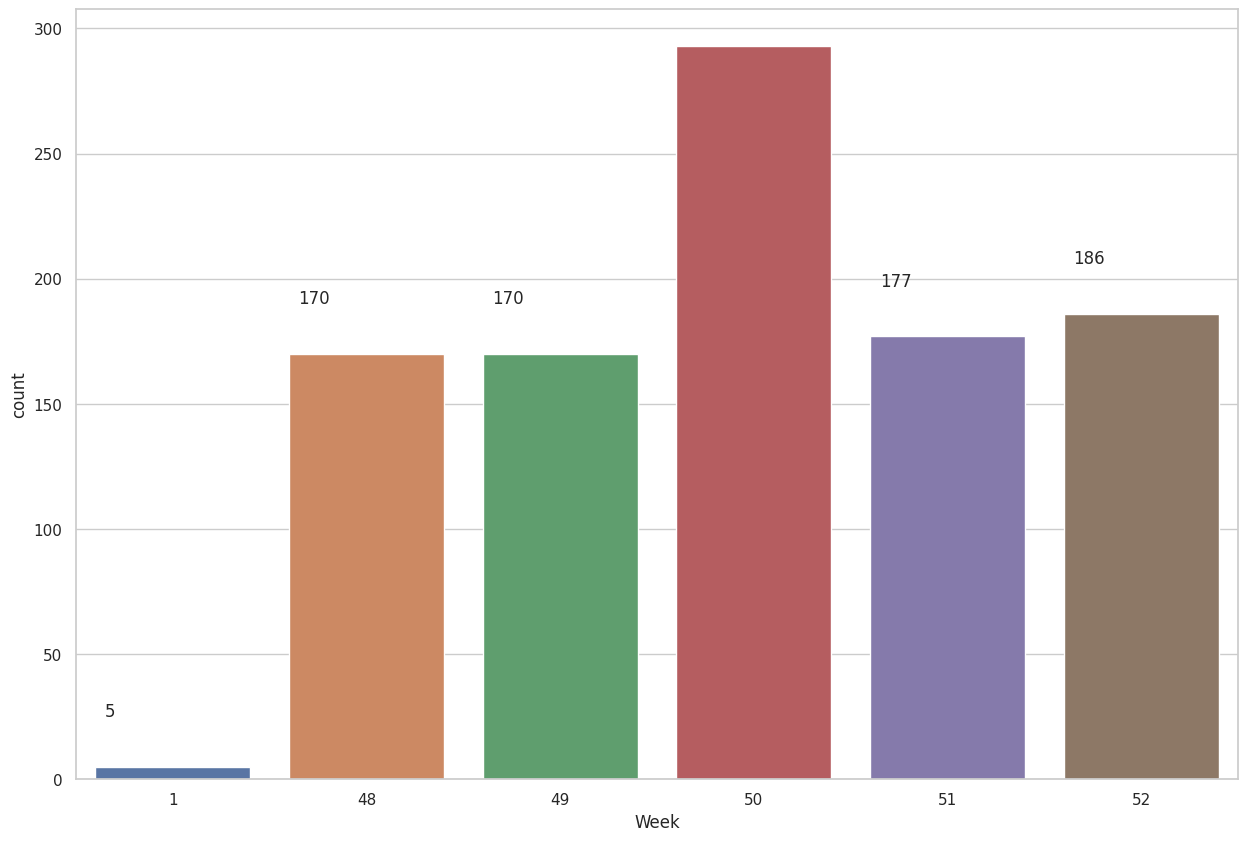

In [14]:
f, ax = plt.subplots(figsize=(15, 10))

sns.countplot(x=tweets_df1['Week'])

for p in ax.patches:
    

    ax.annotate(int(p.get_height()), (p.get_x()+0.05, p.get_height()+20), fontsize=12)


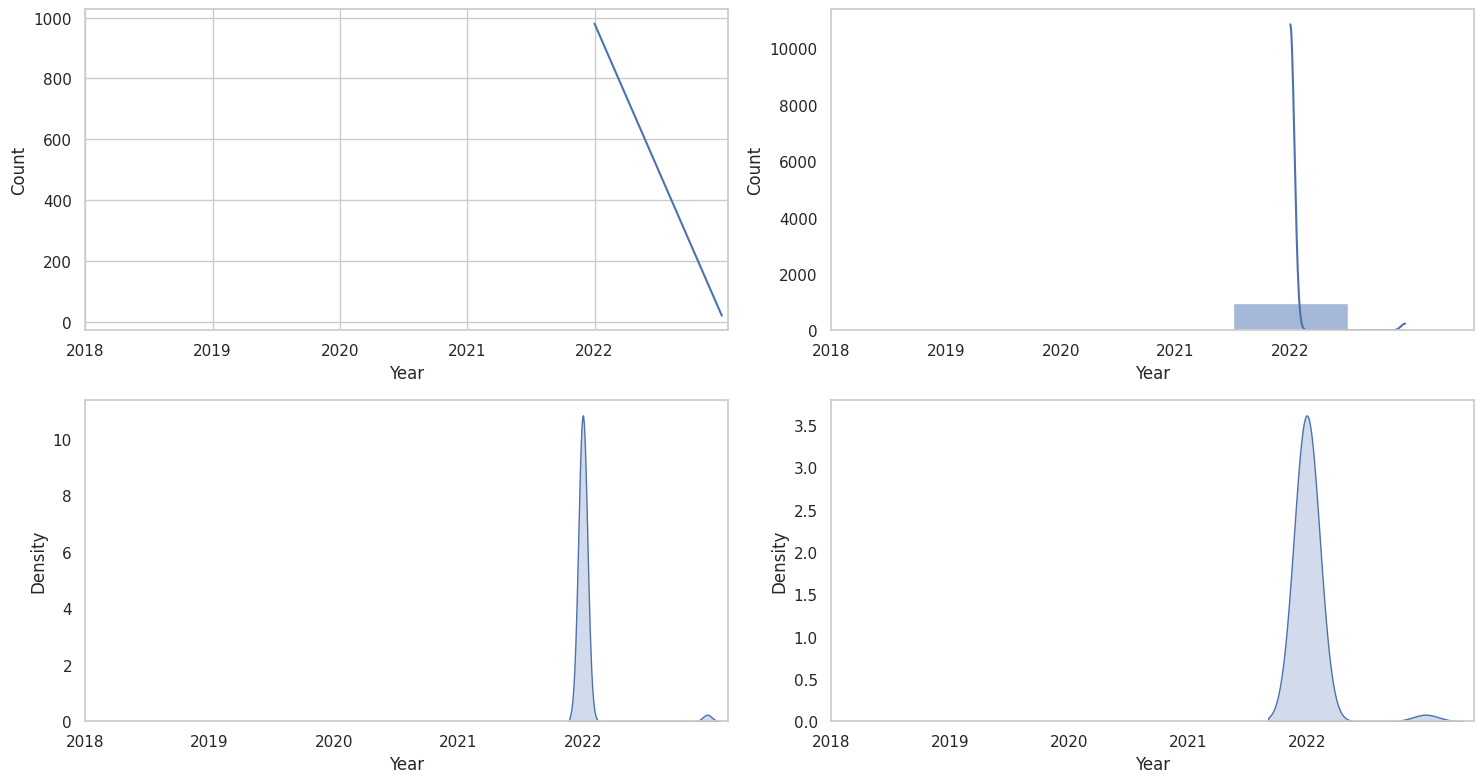

In [15]:

plt.figure(figsize=(15, 8))

ax = plt.subplot(221)

sns.lineplot(tweets_df1.Year.value_counts())

ax.set_xlabel("Year")

ax.set_ylabel('Count')

plt.xticks(np.arange(2018, 2023, 1))

plt.subplot(222)

sns.histplot(x=tweets_df1.Year, stat='count', binwidth=1, kde='true', discrete=True)

plt.xticks(np.arange(2018, 2023, 1))

plt.grid()

plt.subplot(223)

sns.kdeplot(x=tweets_df1.Year, fill=True)

plt.xticks(np.arange(2018, 2023, 1))

plt.grid()

plt.subplot(224)

sns.kdeplot(x=tweets_df1.Year, fill=True, bw_adjust=3)

plt.xticks(np.arange(2018, 2023, 1))

plt.grid()

plt.tight_layout()

plt.show()
